# Visualization Project

## Engineering Team Performance Analysis

Overview
This project presents a comprehensive analysis of a Development Engineering Team's performance metrics and workload distribution. By leveraging data from our ticketing system, we gain valuable insights into team productivity and individual contributions within our Scrum framework.
Objectives

Evaluate team workload distribution and capacity
Analyze individual engineer performance and contributions
Track sprint completion rates and story point velocity

Methodology
The analysis uses data extracted from our daily ticketing system, focusing on two-week sprint cycles following Scrum methodology.
Data Structure
|Field | Description |
| --- | --- |
| sprint | Sprint identifier (Format: Q#-S# where Q=Quarter, S=Sprint number) |
| ticket | Unique ticket identifier (Format: PROJ#-### e.g., PROJ1-520) |
| Description | Brief task description |
| story_points | Effort estimation assigned by the team |
| statusCurrent ticket status |
| engineer | Engineer assigned team member |


In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('byDev.csv')
df.head()

,sprint,ticket,description,story_points,Status,engineer
0,Q1-S1,PROJ1-520,Paid Impressions in 2022 not lining up with Pl...,2,DONE,Engineer 1
1,Q1-S1,PROJ1-515,Convert Data Stored in the S3 bucket into a SQ...,1,DONE,Engineer 2
2,Q1-S1,PROJ1-497,Monthly Report - BAU,3,DONE,Engineer 1
3,Q1-S1,PROJ1-499,BAU DE Support Q1-24-S1,2,DONE,Engineer 1
4,Q1-S1,PROJ1-499,BAU DE Support Q1-24-S1,1,DONE,Engineer 3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sprint        167 non-null    object
 1   ticket        167 non-null    object
 2   description   167 non-null    object
 3   story_points  167 non-null    int64 
 4   Status        167 non-null    object
 5   engineer      167 non-null    object
dtypes: int64(1), object(5)
memory usage: 8.0+ KB


In [5]:
# We have some engineers in the Dataset that are not truly part of this team and they resolve just a few tickets
# during the sprint, so for that reason we are removing those users from the dataset
to_remove= ['Engineer 6','Engineer 7','Engineer 8','Engineer 9']
filtered_df = df[~df['engineer'].isin(to_remove)]
df = filtered_df
df.shape


(161, 6)

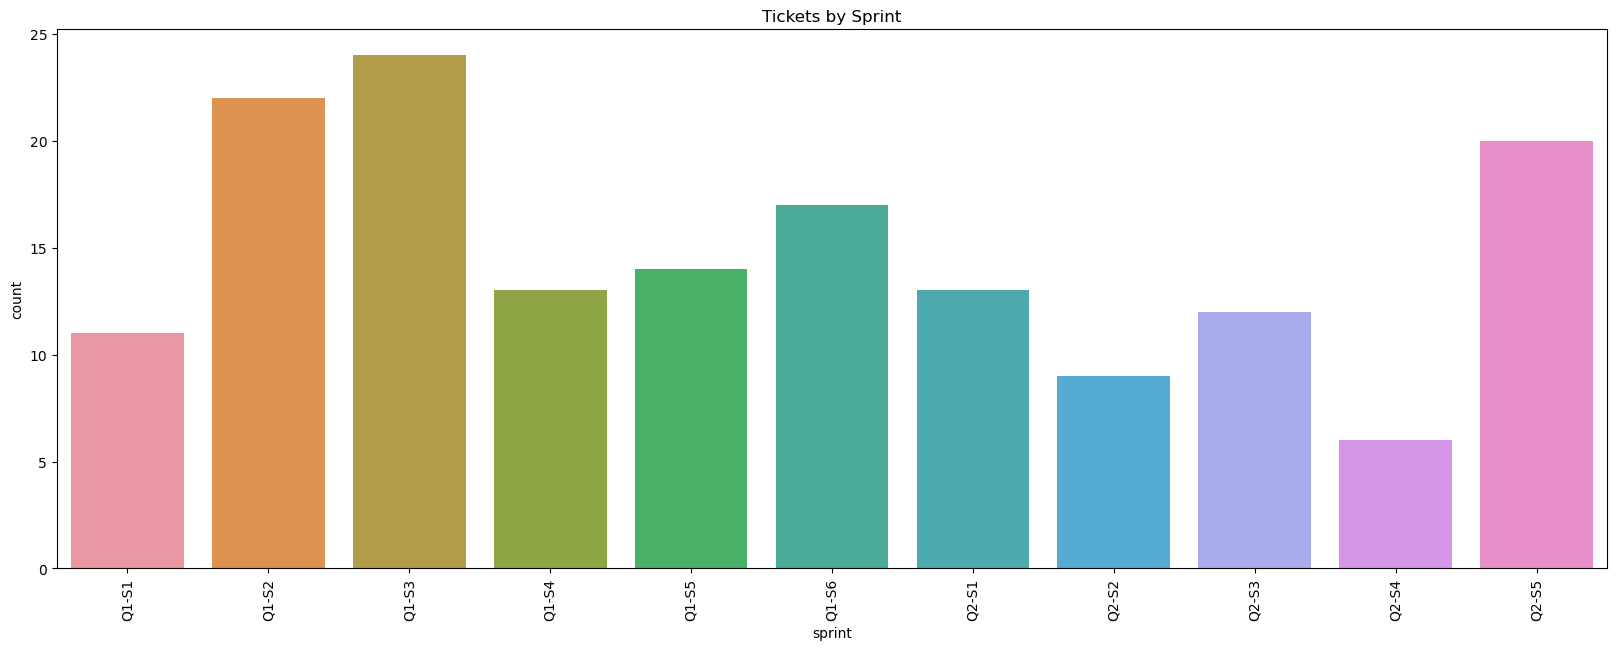

In [6]:
# First, We will plot the total number of tickets by Sprint in a bar plot
plt.figure(figsize=(20,7))
sns.countplot(data=df, x='sprint')
plt.title('Tickets by Sprint')
plt.xticks(rotation=90)
plt.savefig('ticketsBySprint.jpg')
plt.show()

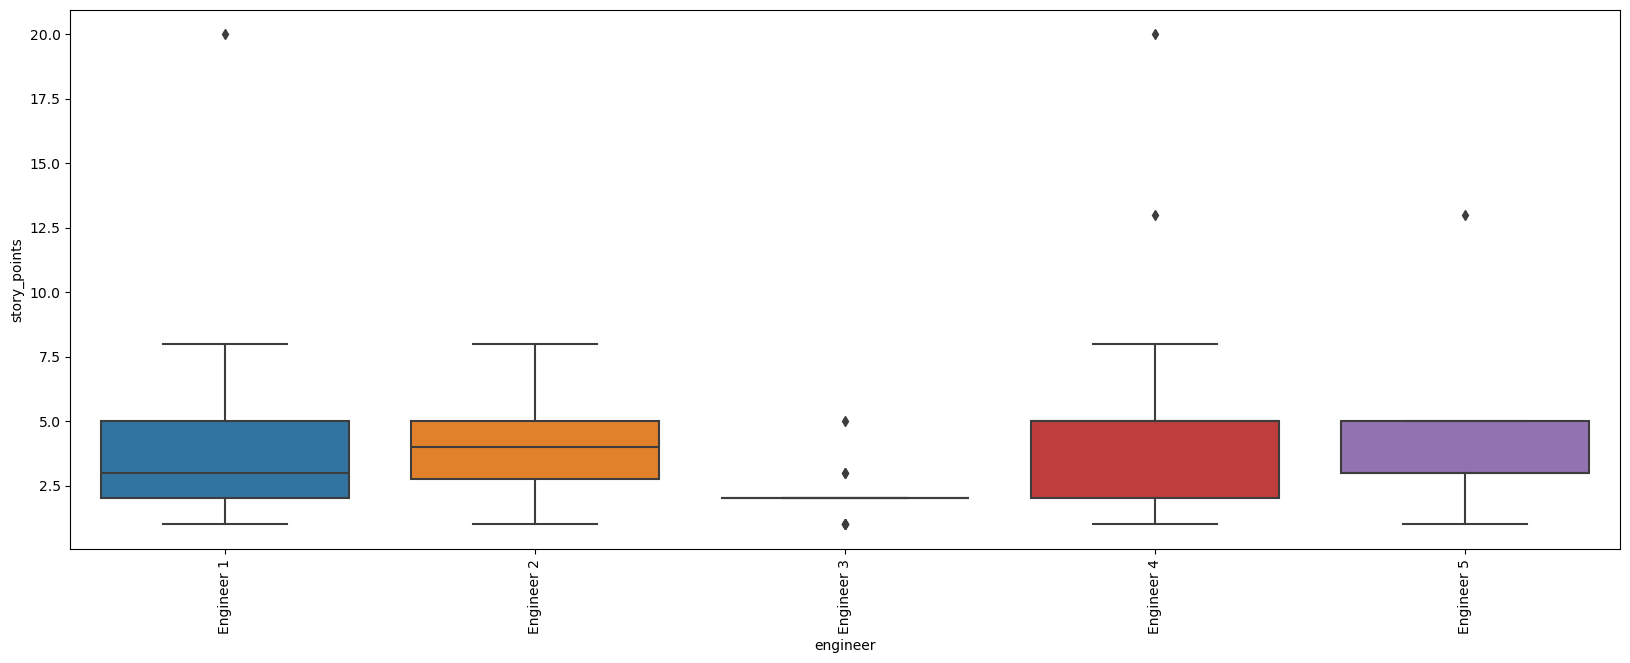

In [7]:
# Now, let's plot boxplots to understand the workload each engineer completed during all the sprints available in the dataset
plt.figure(figsize=(20,7))
sns.boxplot(data=df, x='engineer', y='story_points')
plt.xticks(rotation=90)
plt.show()

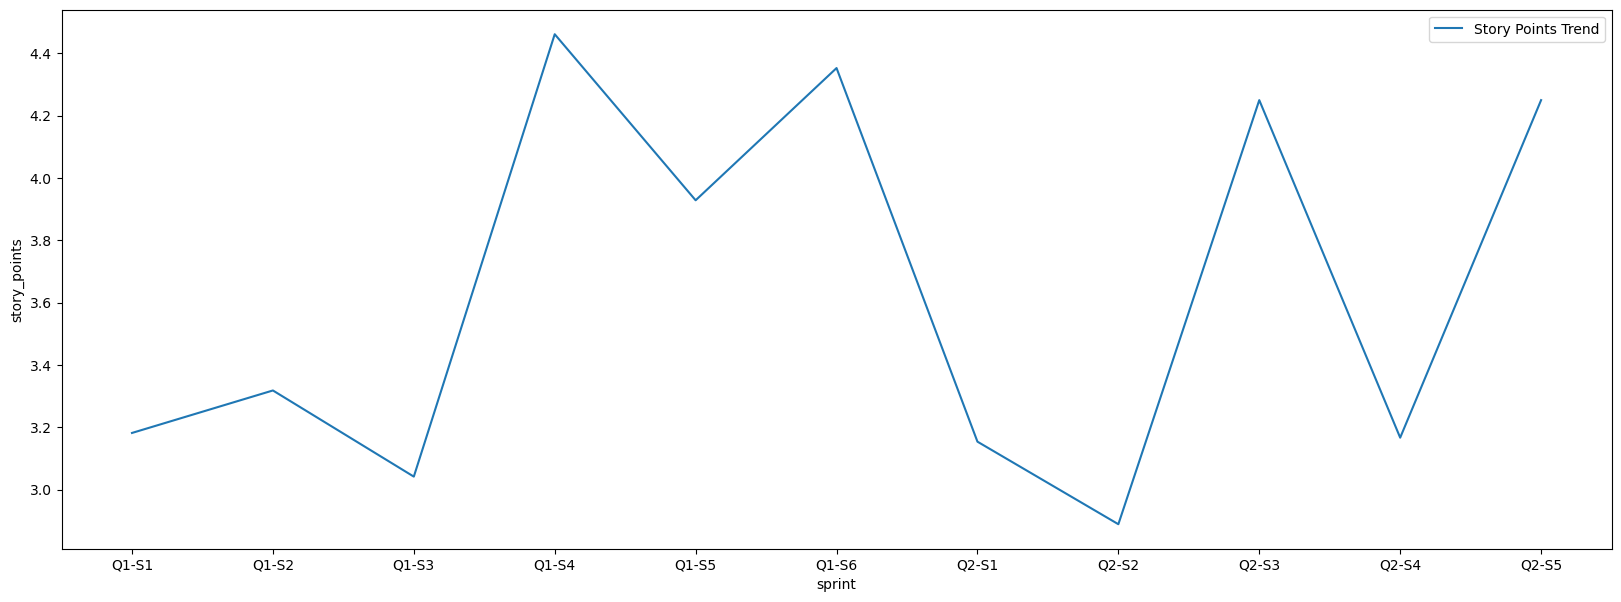

In [8]:
# This is a line plot in which we can visualize the trend or the total number of story points by each Sprint
# As a reference Q#: The quarter of the year
#                S#: The Sprint number
plt.figure(figsize=(20,7))
sns.lineplot(data = df , x = 'sprint' , y = 'story_points', ci=None, label='Story Points Trend')
plt.show()


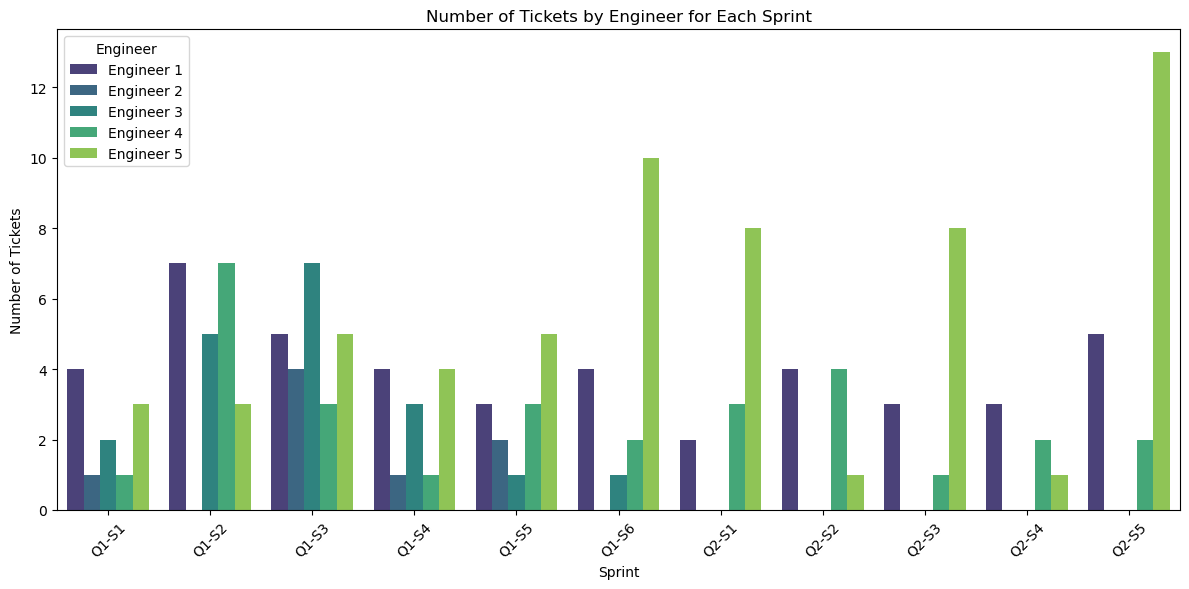

In [9]:
# In this barplot, we are displaying the number of tickets resolved by each engineer by each sprint
# The goal of this chart is to identify behavior or consistency of the team to resolve tickets
ticket_counts = df.groupby(['sprint', 'engineer']).size().reset_index(name='ticket_count')

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=ticket_counts, x='sprint', y='ticket_count', hue='engineer', palette='viridis')
plt.title('Number of Tickets by Engineer for Each Sprint')
plt.xlabel('Sprint')
plt.ylabel('Number of Tickets')
plt.legend(title='Engineer')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

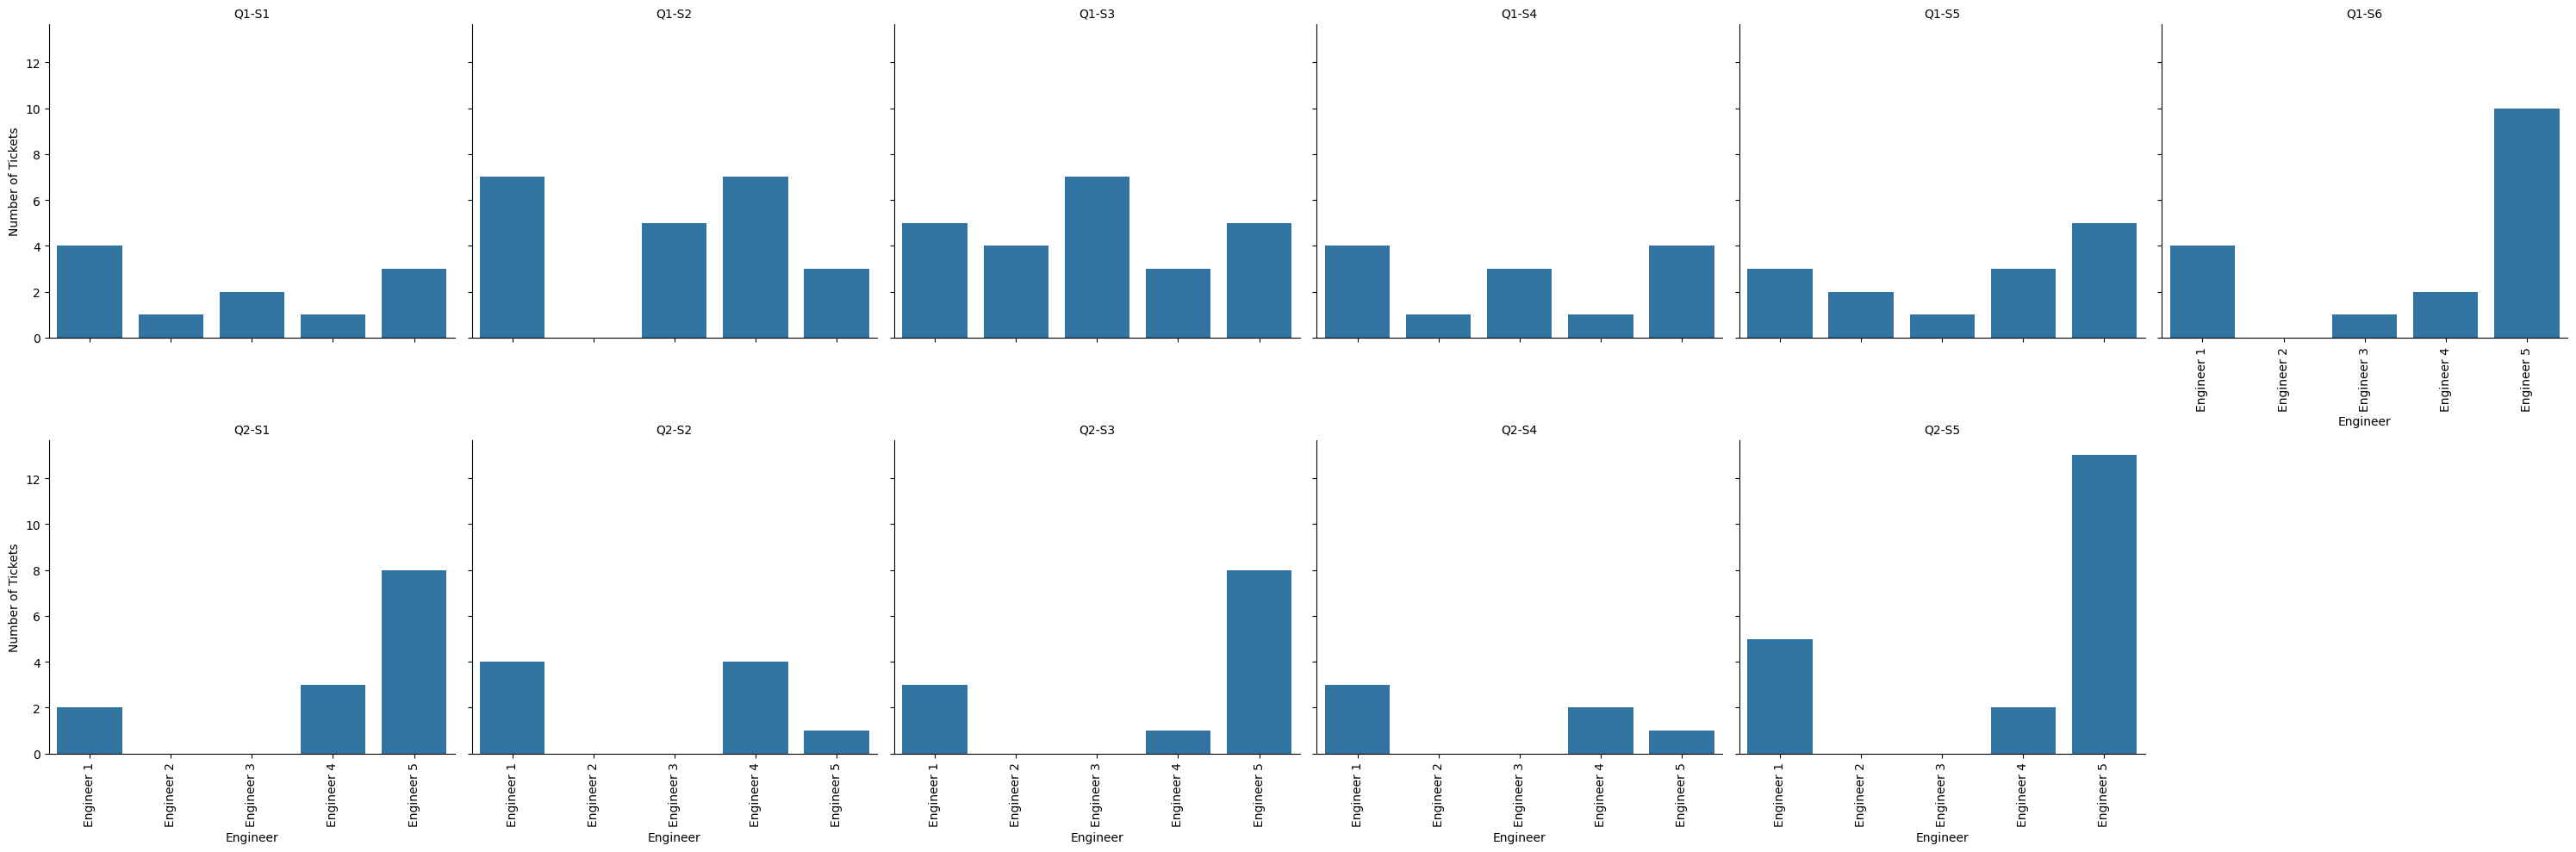

In [10]:
# In this chart , we have another way to visualize these tickets resolved by engineer on the different sprints
# The visualization here is more granular because we can compare the numbers easily between the engineers on each plot
ticket_counts = df.groupby(['sprint', 'engineer']).size().reset_index(name='ticket_count')

# Create a FacetGrid
g = sns.FacetGrid(ticket_counts, col='sprint', col_wrap=6, height=5)

# Plot a bar plot on each facet
g.map(sns.barplot, 'engineer', 'ticket_count', order=ticket_counts['engineer'].unique())

# Adjust the plots
g.set_axis_labels("Engineer", "Number of Tickets")
g.set_titles("{col_name}")

# Rotate x labels for better readability
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

# Show the plot
plt.tight_layout()
plt.show()

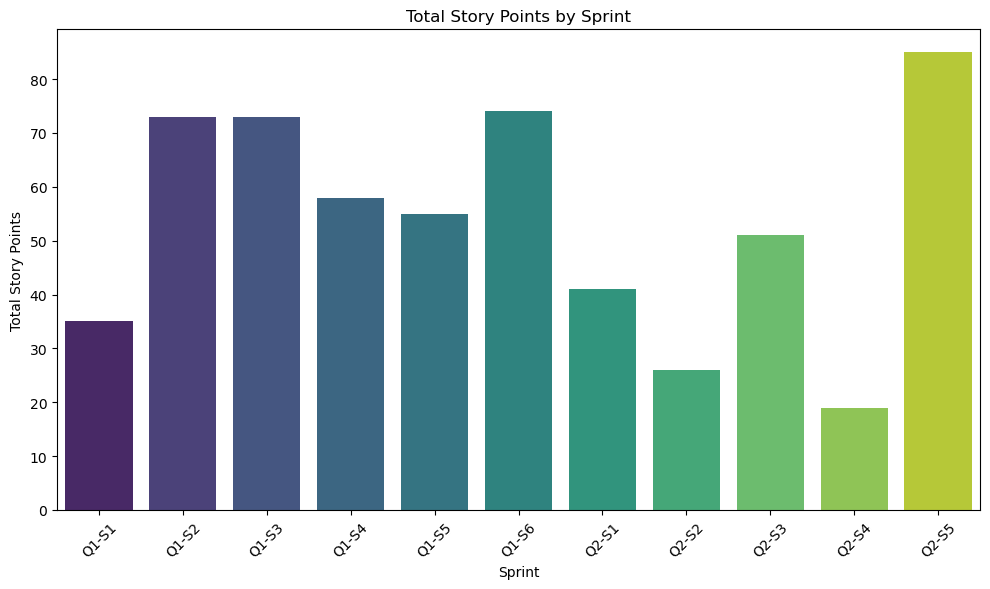

In [11]:
# In this chart, we calculate the total story points per sprint
total_story_points = df.groupby('sprint')['story_points'].sum().reset_index()

# Plotting using Seaborn barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='sprint', y='story_points', data=total_story_points, palette='viridis')
plt.xlabel('Sprint')
plt.ylabel('Total Story Points')
plt.title('Total Story Points by Sprint')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

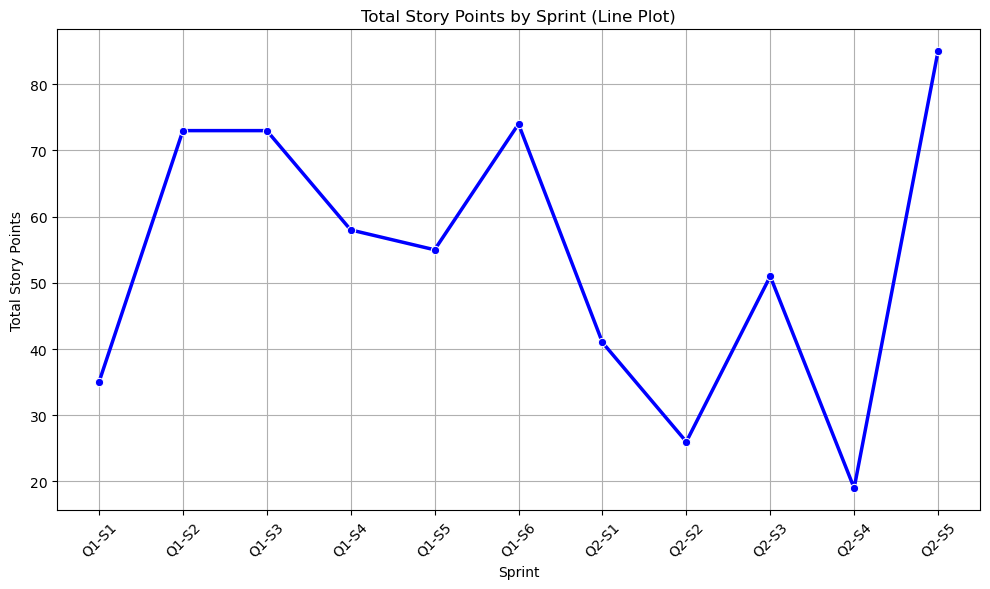

In [12]:
# Here another way how to visualize the number of story points resolved by sprint
total_story_points = df.groupby('sprint')['story_points'].sum().reset_index()

# Plotting using Seaborn lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(x='sprint', y='story_points', data=total_story_points, marker='o', color='b', linewidth=2.5)
plt.xlabel('Sprint')
plt.ylabel('Total Story Points')
plt.title('Total Story Points by Sprint (Line Plot)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.grid(True)  # Enable grid for better visualization
plt.tight_layout()
# We can save these charts to local disk using these 2 lines
# plt.savefig('storypointsBySprint.jpg')
# plt.show()


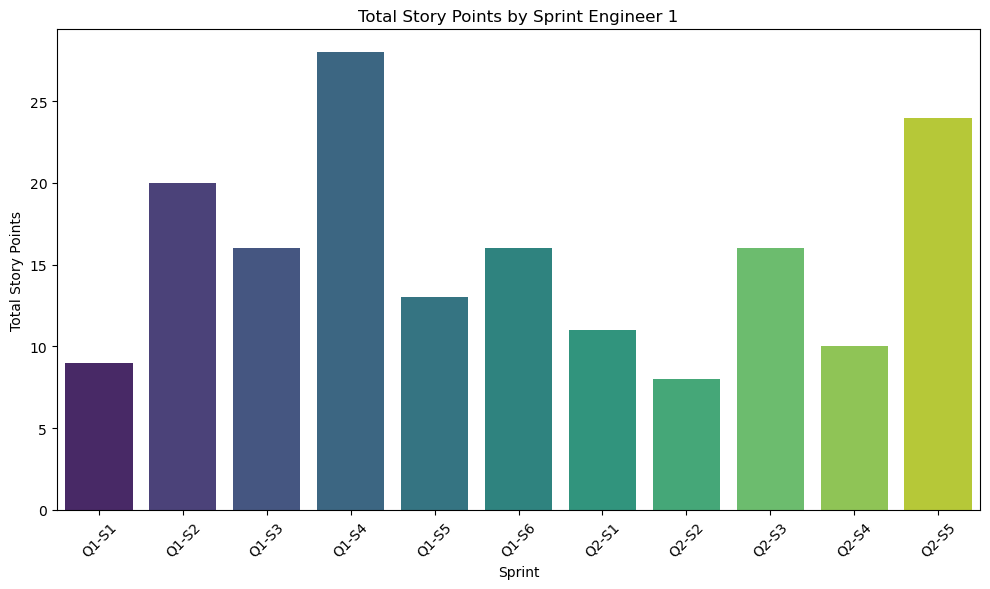

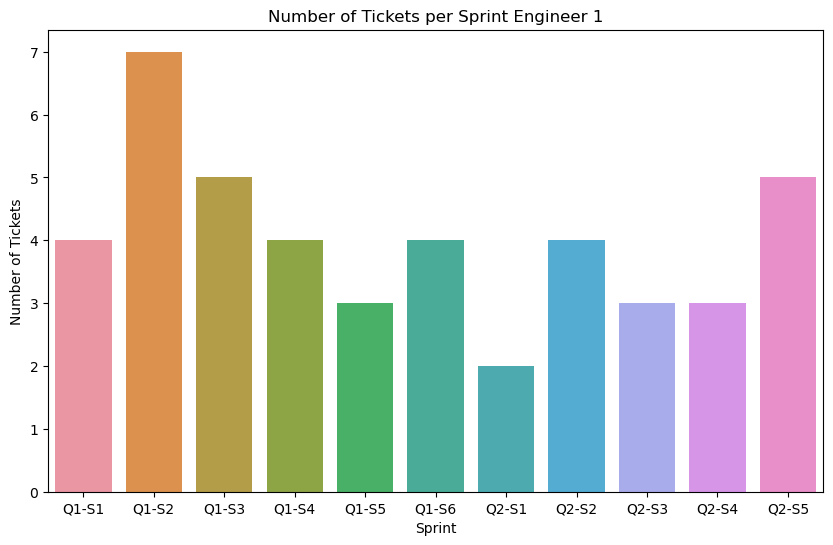

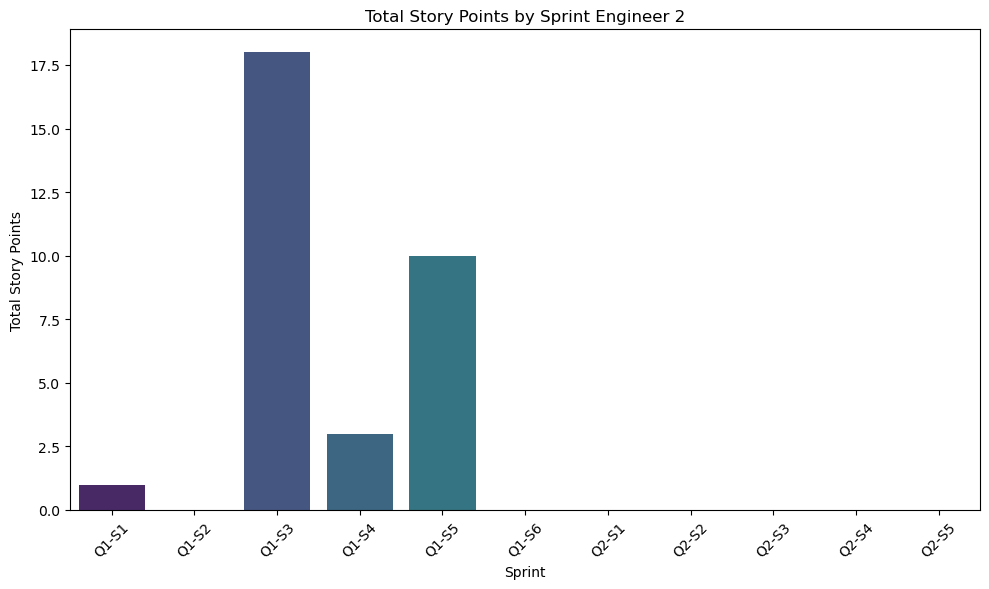

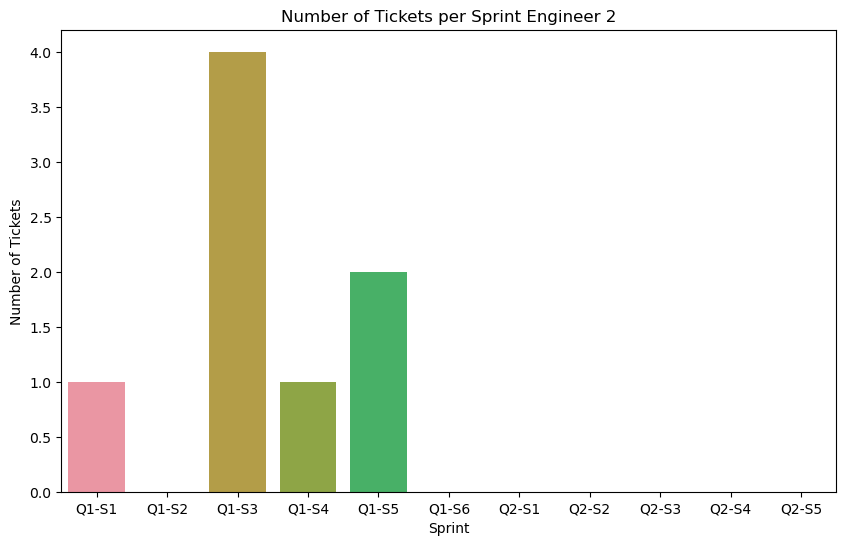

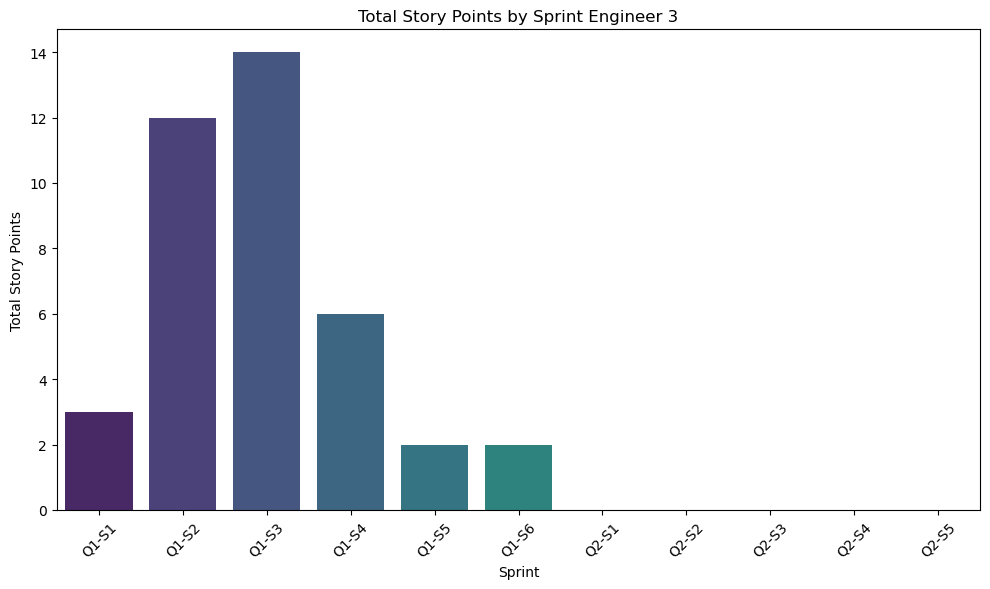

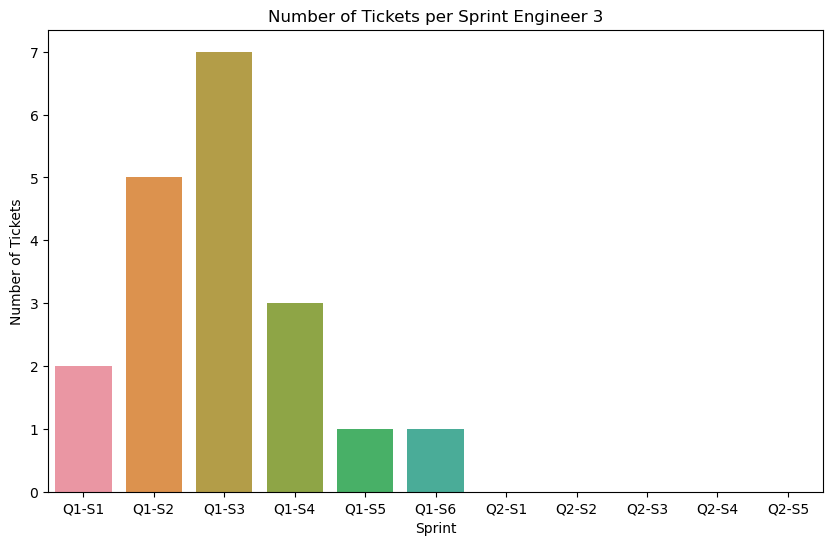

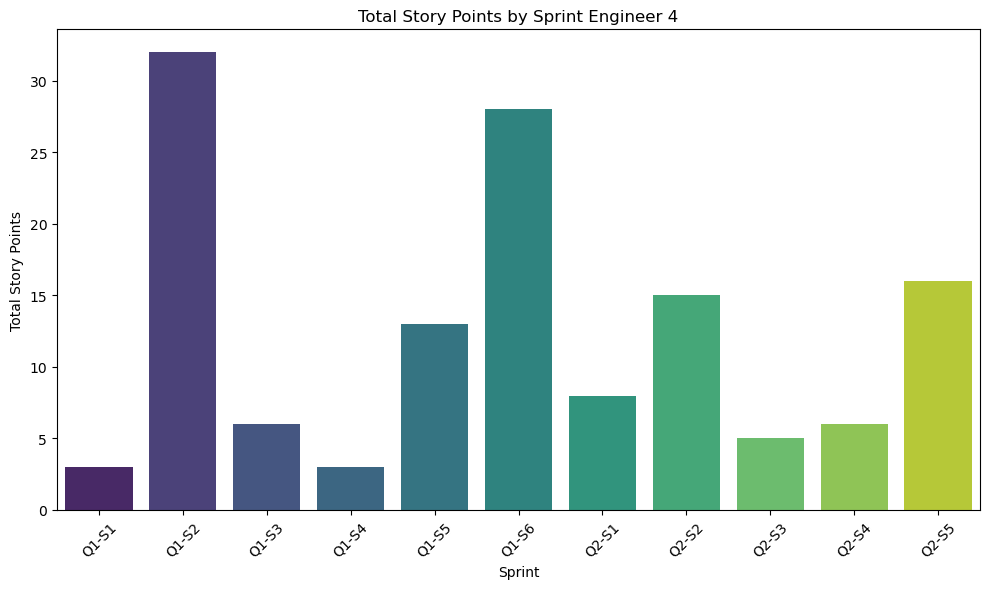

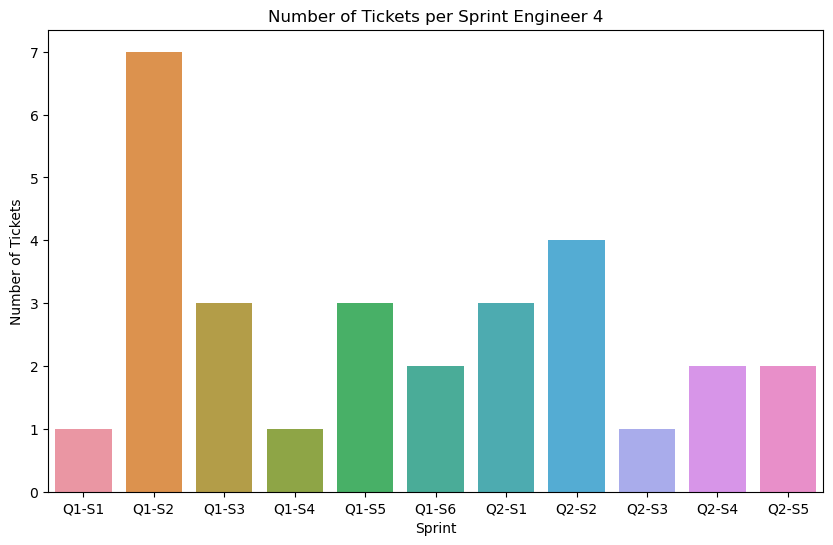

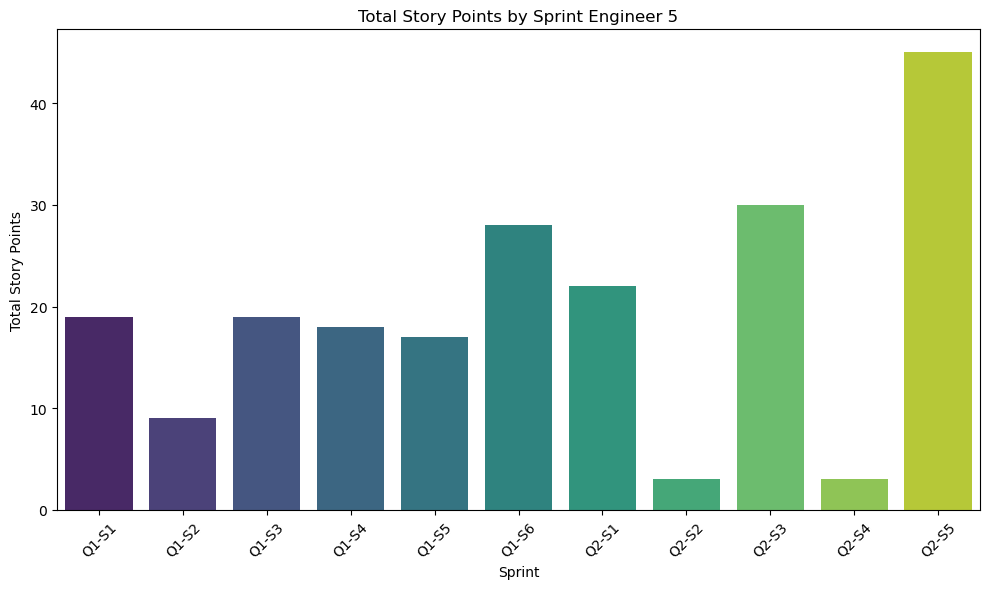

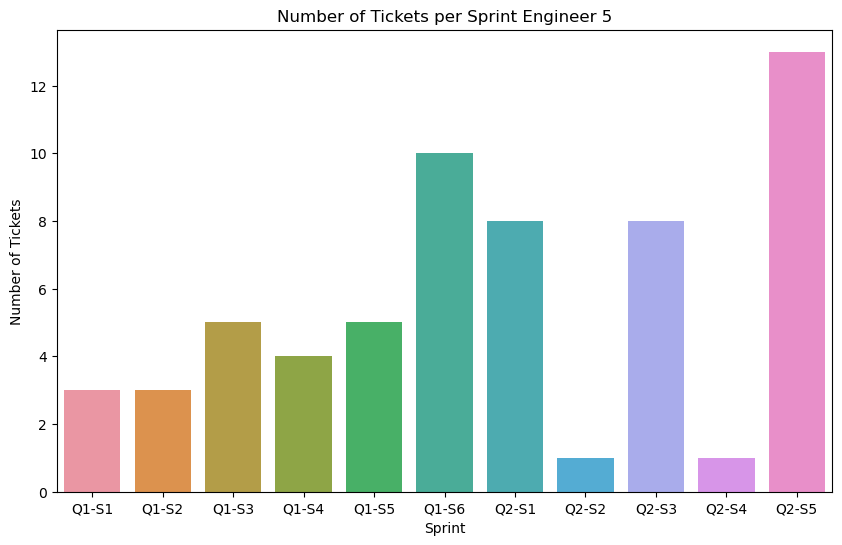

In [13]:
# In this section we will do individual analysis of each engineer to plot
# - Total Story points by Engineer on each sprint
# - Number of tickets resolved by Engineer on each sprint
# These chart is something that we will shared with the tech lead of this team, to identify any trend, bottleneck or even needs of training 

desired_order = ['Q1-S1', 'Q1-S2', 'Q1-S3', 'Q1-S4', 'Q1-S5', 'Q1-S6', 'Q2-S1','Q2-S2', 'Q2-S3', 'Q2-S4', 'Q2-S5']
engineers = ['Engineer 1', 'Engineer 2','Engineer 3', 'Engineer 4', 'Engineer 5']

for engineer in engineers:
    
    df_byEngineer = df[df['engineer']==engineer]
   
    total_story_points = df_byEngineer.groupby('sprint')['story_points'].sum().reset_index()
    ticket_counts = df_byEngineer['sprint'].value_counts().reset_index()
    ticket_counts.columns = ['sprint', 'ticket_count']
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='sprint', y='story_points', data=total_story_points, palette='viridis', order=desired_order)
    plt.xlabel('Sprint')
    plt.ylabel('Total Story Points')
    plt.title('Total Story Points by Sprint ' + engineer)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
    plt.tight_layout()
    # Remove comment to save these plots on local disk
    #plt.savefig(engineer + '_sp_sprint.jpg')
    #plt.show()
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='sprint', y='ticket_count', data=ticket_counts, order=desired_order)
    plt.xlabel('Sprint')
    plt.ylabel('Number of Tickets')
    plt.title('Number of Tickets per Sprint ' + engineer)
    # Remove comment to save these plots on Local disk
    #plt.savefig(engineer + '_ticket_sprint.jpg')
    #plt.show()


In [14]:
# Here we will calculate important metrics that will help us to understand better the performance of this team
# Team average of
#  - Tickets resolved
#  - Story points
# Individual performance of the engineers with
#  - avg tickets resolved
#  - avg story points resolved

resolved_tickets = df[df['Status']=='DONE']
# Calculate average per sprint for the whole team
team_avg_tickets = resolved_tickets.groupby('sprint')['ticket'].count().mean()
team_avg_sp      = resolved_tickets.groupby('sprint')['story_points'].sum().mean()
print(f"Team resolved on average: {team_avg_tickets:.2f} tickets and {team_avg_sp:.2f} story points by sprint\n")
    
# Calculate breakdown by engineer
print("Average by engineer:")
for engineer in engineers:
    engineer_tickets = resolved_tickets[resolved_tickets['engineer']==engineer]
    avg_tickets = engineer_tickets.groupby('sprint')['ticket'].count().mean()
    avg_sp      = engineer_tickets.groupby('sprint')['story_points'].sum().mean()
    print(f"{engineer} resolved: {avg_tickets:.2f} tickets and {avg_sp:.2f} per sprint")
        
# You can also calculate the total tickets resolved by each engineer
total_by_engineer_tickets = resolved_tickets.groupby('engineer')['ticket'].count()
total_by_engineer_sp      = resolved_tickets.groupby('engineer')['story_points'].sum()
print("\nTotals number of tickets resolved by each engineer:")
print(total_by_engineer_tickets)
print("\nTotals number of story points resolved by each engineer:")
print(total_by_engineer_sp)

Team resolved on average: 14.27 tickets and 52.55 story points by sprint

Average by engineer:
Engineer 1 resolved: 3.91 tickets and 15.27 per sprint
Engineer 2 resolved: 2.33 tickets and 9.67 per sprint
Engineer 3 resolved: 3.00 tickets and 6.00 per sprint
Engineer 4 resolved: 2.64 tickets and 12.27 per sprint
Engineer 5 resolved: 5.45 tickets and 19.09 per sprint

Totals number of tickets resolved by each engineer:
engineer
Engineer 1    43
Engineer 2     7
Engineer 3    18
Engineer 4    29
Engineer 5    60
Name: ticket, dtype: int64

Totals number of story points resolved by each engineer:
engineer
Engineer 1    168
Engineer 2     29
Engineer 3     36
Engineer 4    135
Engineer 5    210
Name: story_points, dtype: int64


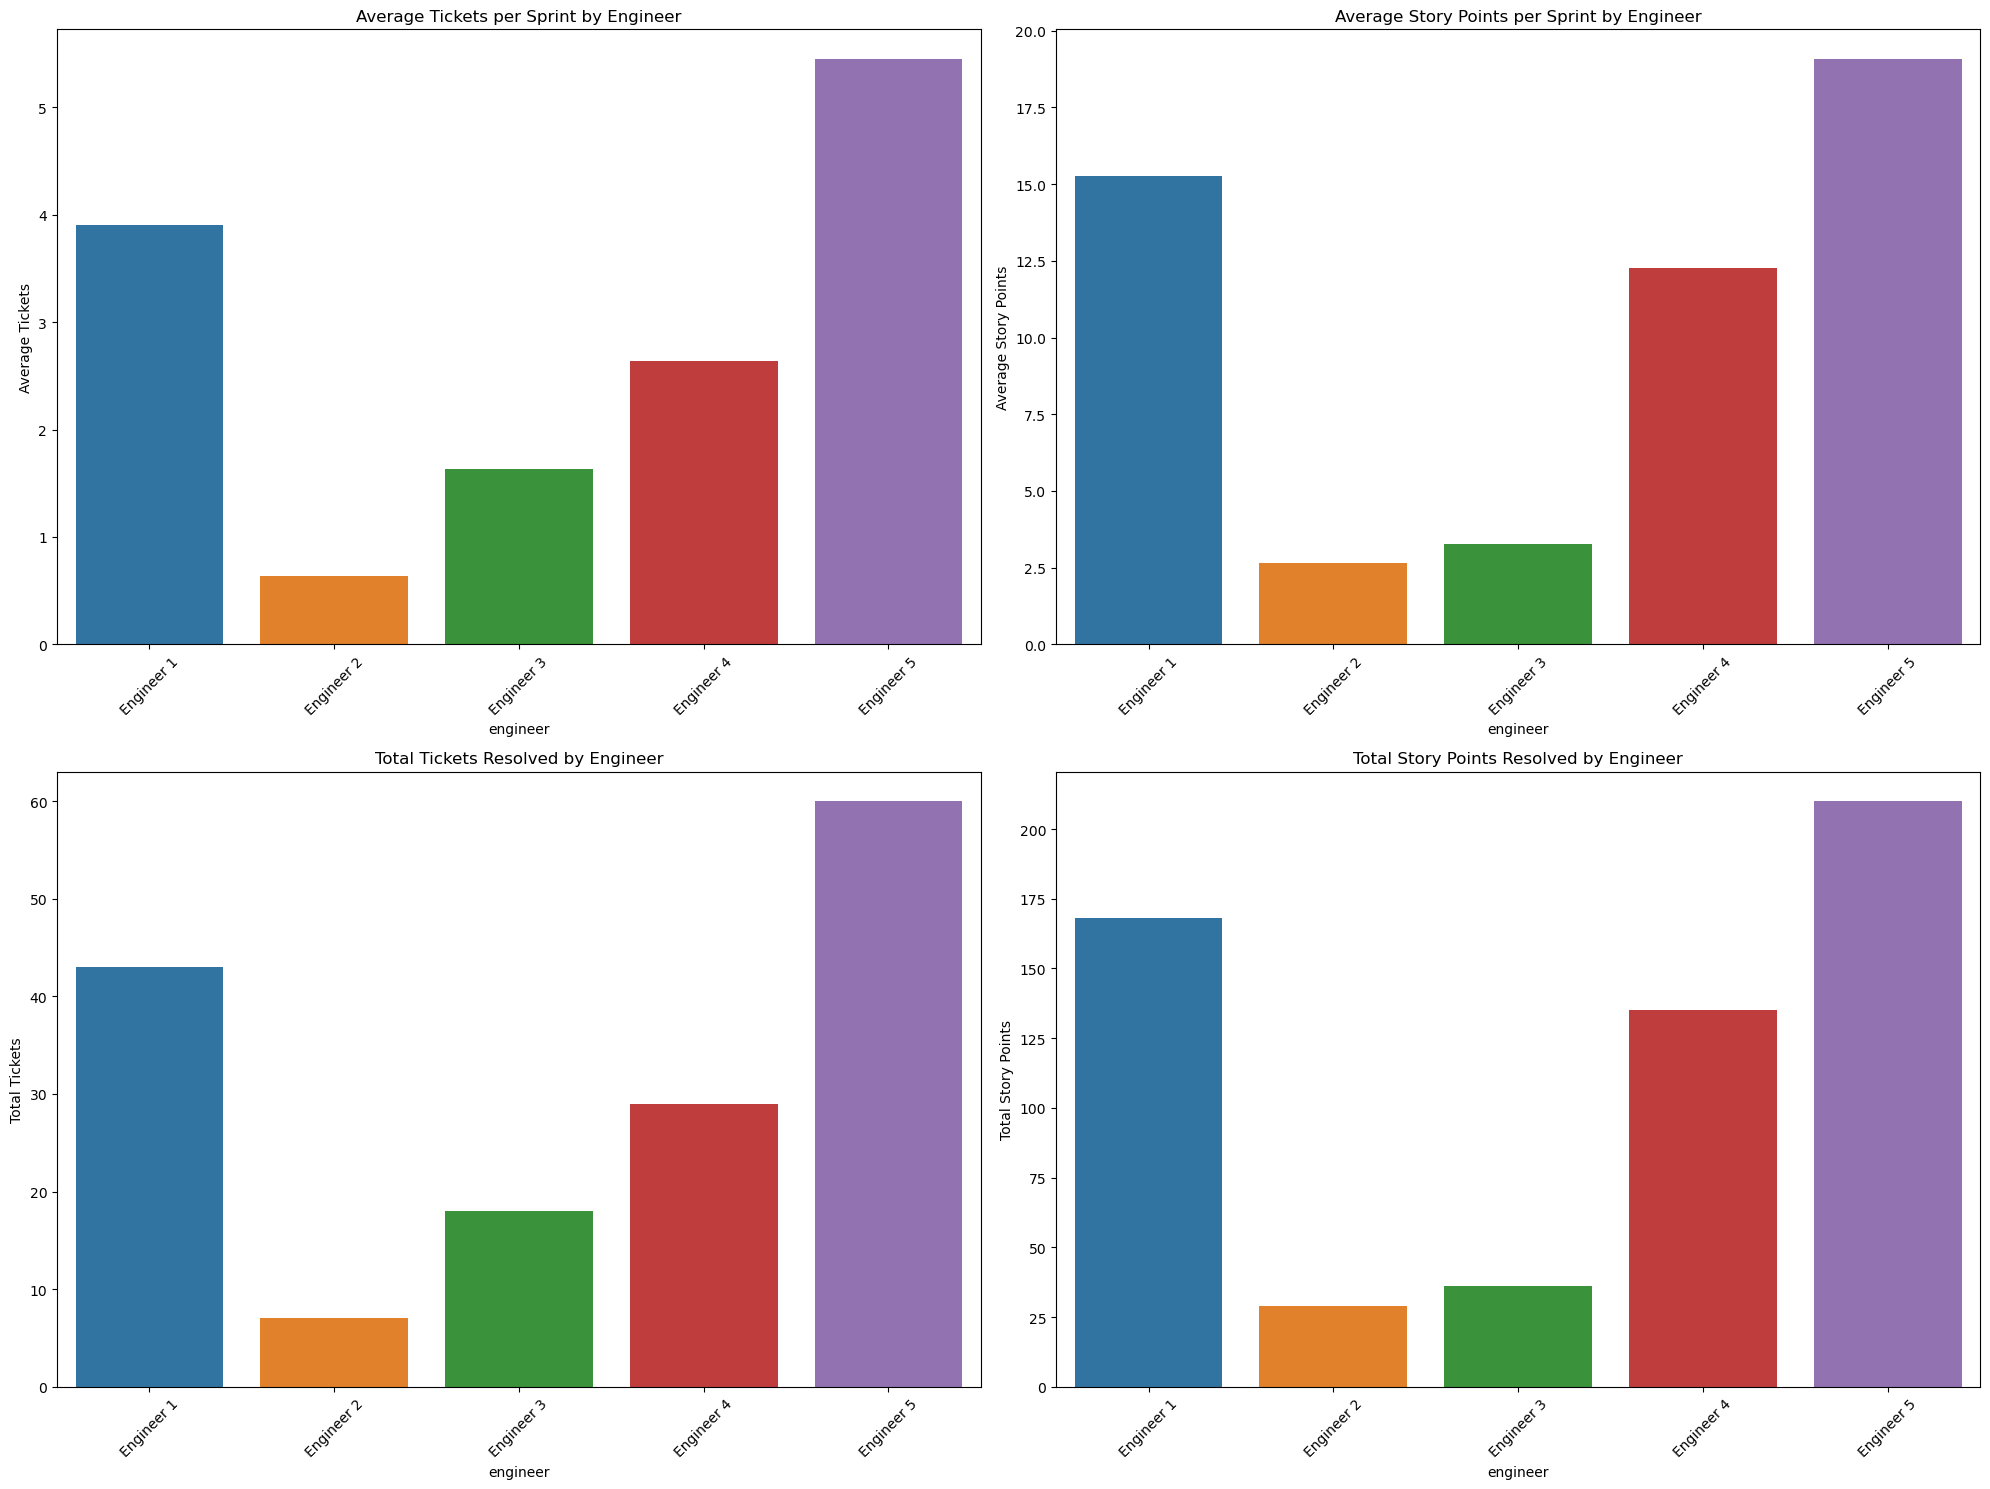

In [15]:
# Create figure with subplots
plt.figure(figsize=(20,15))

# Plot 1: Average tickets per sprint by engineer
plt.subplot(2,2,1)
avg_tickets_by_eng = resolved_tickets.groupby('engineer')['ticket'].count() / len(resolved_tickets['sprint'].unique())
sns.barplot(x=avg_tickets_by_eng.index, y=avg_tickets_by_eng.values)
plt.title('Average Tickets per Sprint by Engineer')
plt.xticks(rotation=45)
plt.ylabel('Average Tickets')

# Plot 2: Average story points per sprint by engineer
plt.subplot(2,2,2)
avg_sp_by_eng = resolved_tickets.groupby('engineer')['story_points'].sum() / len(resolved_tickets['sprint'].unique())
sns.barplot(x=avg_sp_by_eng.index, y=avg_sp_by_eng.values)
plt.title('Average Story Points per Sprint by Engineer')
plt.xticks(rotation=45)
plt.ylabel('Average Story Points')

# Plot 3: Total tickets by engineer
plt.subplot(2,2,3)
sns.barplot(x=total_by_engineer_tickets.index, y=total_by_engineer_tickets.values)
plt.title('Total Tickets Resolved by Engineer')
plt.xticks(rotation=45)
plt.ylabel('Total Tickets')

# Plot 4: Total story points by engineer
plt.subplot(2,2,4)
sns.barplot(x=total_by_engineer_sp.index, y=total_by_engineer_sp.values)
plt.title('Total Story Points Resolved by Engineer')
plt.xticks(rotation=45)
plt.ylabel('Total Story Points')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()